<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/7.%20Deep%20Learning%20CNN/2_DeepLearning_ConvolutionNeuralNetworks_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning For Object Detection and Image Classification

<h4 align='center'> Keras CNN with CIFAR-10 </h4>

- Color images dataset

In [1]:
# Checking GPU available on Colab

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Sun Dec 13 04:13:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##### With Smaller CNN Model

In [2]:
#import libraries

from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

from sklearn.metrics import classification_report

In [3]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()
print('Training size: ',x_train.shape) # we have 50000 images of training dataset with 32 x 32 pixels of 3 color channels

170500096/170498071 [==============================] - 6s 0us/step
Training size:  (50000, 32, 32, 3)


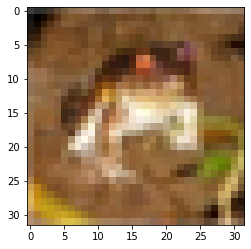

In [4]:
single_image = x_train[0]
plt.imshow(single_image) #low resolution

##### Pre-processing

In [5]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

single_image = x_train[0]
single_image.max()

1.0

In [6]:
x_test.shape #10000 images

(10000, 32, 32, 3)

In [7]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

print('First Index')
print(y_train[0])
print(y_cat_train[0])
print('------------------------------------------------')
print('Second Index')
print(y_train[1])
print(y_cat_train[1])

First Index
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
------------------------------------------------
Second Index
[9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
model = Sequential() #create a model

#Conv Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#----------------------------------------------------#

#Conv Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#----------------------------------------------------#

#Flatten out to understand Dense layer (2D-->1D)
model.add(Flatten())

#Dense Layer
model.add(Dense(256,activation='relu'))

#Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [10]:
#Train model

model.fit(x_train,y_cat_train,epochs=50,verbose=1)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5220 - accuracy: 0.4546
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1645 - accuracy: 0.5930
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0066 - accuracy: 0.6505
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9008 - accuracy: 0.6902
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8161 - accuracy: 0.7211
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7505 - accuracy: 0.7455
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7006 - accuracy: 0.7616
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6512 - accuracy: 0.7785
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6184 - accuracy: 0.7924
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.586

In [11]:
print('Metrics used: ', model.metrics_names)

#evaluate using test dataset

model.evaluate(x_test,y_cat_test)

Metrics used:  ['loss', 'accuracy']
313/313 [==============================] - 1s 2ms/step - loss: 4.0851 - accuracy: 0.6779


[4.085117816925049, 0.6779000163078308]

In [12]:
predictions = model.predict_classes(x_test)

print('First Index')
print('Testing Dataset: ',y_cat_test[0])
print('Predicted value: ',predictions[0])
print('------------------------------------------------')
print('Second Index')
print('Testing Dataset: ',y_cat_test[1])
print('Predicted value: ',predictions[1])

print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
First Index
Testing Dataset:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted value:  3
------------------------------------------------
Second Index
Testing Dataset:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted value:  8
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1000
           1       0.78      0.84      0.81      1000
           2       0.59      0.58      0.58      1000
           3       0.48      0.45      0.47      1000
           4       0.64      0.60      0.62      1000
           5       0.54      0.64      0.58      1000
           6       0.75      0.73      0.74      1000
           7       

##### With Larger Model

In [13]:
model = Sequential() #create a model

#Conv Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#----------------------------------------------------#

#Conv Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#----------------------------------------------------#

#Flatten out to understand Dense layer (2D-->1D)
model.add(Flatten())

#Dense Layer
model.add(Dense(512,activation='relu'))

#Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        16416     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [15]:
#Train model

model.fit(x_train,y_cat_train,epochs=50,verbose=1)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6236 - accuracy: 0.4134
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2469 - accuracy: 0.5572
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0996 - accuracy: 0.6135
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0043 - accuracy: 0.6519
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9579 - accuracy: 0.6699
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9354 - accuracy: 0.6827
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9263 - accuracy: 0.6849
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9208 - accuracy: 0.6877
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9194 - accuracy: 0.6929
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.921

In [16]:
print('Metrics used: ', model.metrics_names)

#evaluate using test dataset

model.evaluate(x_test,y_cat_test)

Metrics used:  ['loss', 'accuracy']
313/313 [==============================] - 1s 2ms/step - loss: 1.3410 - accuracy: 0.6346


[1.3409852981567383, 0.6345999836921692]

In [17]:
predictions = model.predict_classes(x_test)

print('First Index')
print('Testing Dataset: ',y_cat_test[0])
print('Predicted value: ',predictions[0])
print('------------------------------------------------')
print('Second Index')
print('Testing Dataset: ',y_cat_test[1])
print('Predicted value: ',predictions[1])

print(classification_report(y_test,predictions))

First Index
Testing Dataset:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted value:  9
------------------------------------------------
Second Index
Testing Dataset:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted value:  1
              precision    recall  f1-score   support

           0       0.46      0.86      0.60      1000
           1       0.78      0.84      0.81      1000
           2       0.43      0.65      0.52      1000
           3       0.81      0.18      0.30      1000
           4       0.76      0.41      0.53      1000
           5       0.54      0.67      0.60      1000
           6       0.81      0.69      0.74      1000
           7       0.75      0.63      0.69      1000
           8       0.80      0.67      0.73      1000
           9       0.75      0.73      0.74      1000

    accuracy                           0.63     10000
   macro avg       0.69      0.63      0.63     10000
weighted avg       0.69      0.63      0.63     10000

